## Missing Values

Prepare the dataset by performing the preprocessing techniques, to have the standard scale to data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
sns.set()

In [3]:
claimants = pd.read_csv('claimants.csv')

### Exploratory Data Analysis

In [4]:
claimants.sample(5)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
84,1001,0,0.0,1.0,0.0,40.0,0.834
1068,17433,1,0.0,1.0,0.0,17.0,0.050
747,9193,1,1.0,1.0,0.0,NaN,0.848
905,13354,1,0.0,1.0,0.0,NaN,3.330
914,13514,0,0.0,1.0,0.0,10.0,1.073


In [5]:
claimants.shape

(1340, 7)

In [6]:
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [7]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


### Data Preprocessing

#### Check for missing Values

In [8]:
claimants.isnull().sum().sum()

290

In [9]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
claimants.columns[claimants.isna().any()]

Index(['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE'], dtype='object')

We have 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE' having null values

In [11]:
claimants['CLMSEX'].nunique()

2

In [12]:
claimants['CLMSEX'].unique()

array([ 0.,  1., nan])

<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

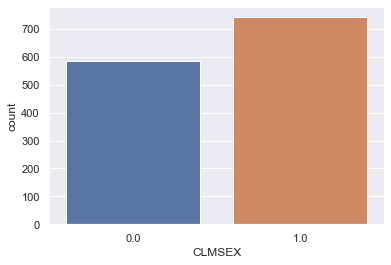

In [13]:
sns.countplot(x="CLMSEX", data=claimants)

### Replace null values with Random sample

In [14]:
# copy the CLMSEX column
claimants['CLMSEX_Random'] = claimants['CLMSEX']

# get the count of missing values for age
missing_count = claimants['CLMSEX'].isna().sum()

missing_count

12

In [15]:
# drop all null valued rows and get a sample from remaining records (sample size = missing count)
random_sample = claimants['CLMSEX'].dropna().sample(missing_count, random_state = 0)

#random_sample.index has indexes from original dataframe sample
#assign missing value indexes to random sample
random_sample.index = claimants[claimants['CLMSEX'].isna()].index

#assign the random sample (with indexes) to rows where boolean series claimants['CLMSEX'].isna() is true
claimants.loc[claimants['CLMSEX'].isna(), 'CLMSEX_Random'] = random_sample

<AxesSubplot:xlabel='CLMSEX_Random', ylabel='count'>

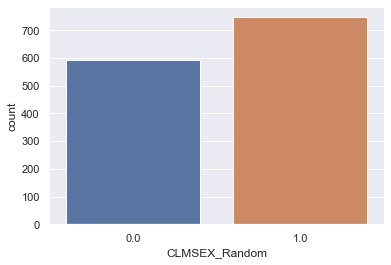

In [16]:
sns.countplot(x="CLMSEX_Random", data=claimants)

In [17]:
claimants['CLMSEX_Random'].unique()

array([0., 1.])

In [18]:
claimants.isnull().sum()

CASENUM            0
ATTORNEY           0
CLMSEX            12
CLMINSUR          41
SEATBELT          48
CLMAGE           189
LOSS               0
CLMSEX_Random      0
dtype: int64

We have imputed the null values with random sample for  CLMSEX , creating a new column CLMSEX_Random 

In [19]:
claimants['CLMINSUR'].nunique()

2

In [20]:
claimants['CLMINSUR'].unique()

array([ 1.,  0., nan])

<AxesSubplot:xlabel='CLMINSUR', ylabel='count'>

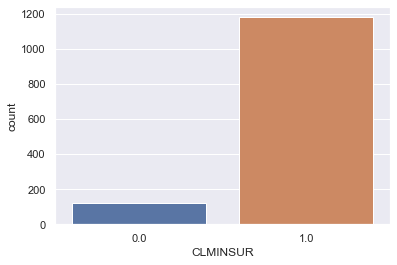

In [21]:
sns.countplot(x="CLMINSUR", data=claimants)

In [22]:
# copy the CLMSEX column
claimants['CLMINSUR_Random'] = claimants['CLMINSUR']

# get the count of missing values for age
missing_count = claimants['CLMINSUR'].isna().sum()

missing_count

41

In [23]:
# drop all null valued rows and get a sample from remaining records (sample size = missing count)
random_sample = claimants['CLMINSUR'].dropna().sample(missing_count, random_state = 0)

#random_sample.index has indexes from original dataframe sample
#assign missing value indexes to random sample
random_sample.index = claimants[claimants['CLMINSUR'].isna()].index

#assign the random sample (with indexes) to rows where boolean series claimants['CLMSEX'].isna() is true
claimants.loc[claimants['CLMINSUR'].isna(), 'CLMINSUR_Random'] = random_sample

<AxesSubplot:xlabel='CLMINSUR_Random', ylabel='count'>

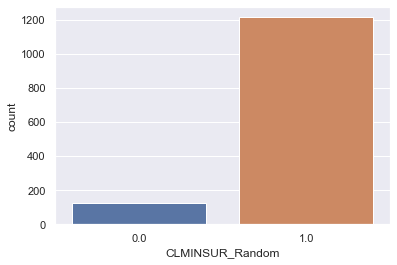

In [24]:
sns.countplot(x="CLMINSUR_Random", data=claimants)

In [25]:
claimants['CLMINSUR_Random'].unique()

array([1., 0.])

In [26]:
claimants.isnull().sum()

CASENUM              0
ATTORNEY             0
CLMSEX              12
CLMINSUR            41
SEATBELT            48
CLMAGE             189
LOSS                 0
CLMSEX_Random        0
CLMINSUR_Random      0
dtype: int64

We have imputed the null values with random sample for CLMINSUR , creating a new column CLMINSUR_Random

In [27]:
claimants['SEATBELT'].nunique()

2

In [28]:
claimants['SEATBELT'].unique()

array([ 0.,  1., nan])

<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

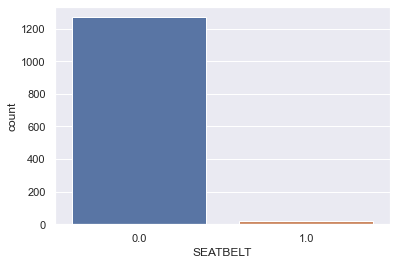

In [29]:
sns.countplot(x="SEATBELT", data=claimants)

In [30]:
# copy the CLMSEX column
claimants['SEATBELT_Random'] = claimants['SEATBELT']

# get the count of missing values for age
missing_count = claimants['SEATBELT'].isna().sum()

missing_count

48

In [31]:
# drop all null valued rows and get a sample from remaining records (sample size = missing count)
random_sample = claimants['SEATBELT'].dropna().sample(missing_count, random_state = 0)

#random_sample.index has indexes from original dataframe sample
#assign missing value indexes to random sample
random_sample.index = claimants[claimants['SEATBELT'].isna()].index

#assign the random sample (with indexes) to rows where boolean series claimants['CLMSEX'].isna() is true
claimants.loc[claimants['SEATBELT'].isna(), 'SEATBELT_Random'] = random_sample

<AxesSubplot:xlabel='SEATBELT_Random', ylabel='count'>

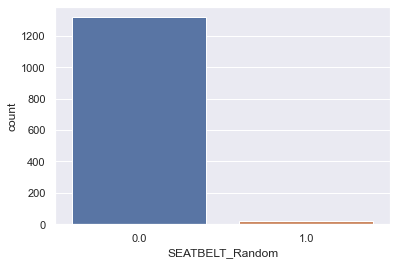

In [32]:
sns.countplot(x="SEATBELT_Random", data=claimants)

In [33]:
claimants['SEATBELT_Random'].unique()

array([0., 1.])

In [34]:
claimants.isnull().sum()

CASENUM              0
ATTORNEY             0
CLMSEX              12
CLMINSUR            41
SEATBELT            48
CLMAGE             189
LOSS                 0
CLMSEX_Random        0
CLMINSUR_Random      0
SEATBELT_Random      0
dtype: int64

### Replace null values with Median

In [35]:
claimants['CLMAGE'].nunique()

68

In [36]:
claimants['CLMAGE']

0       50.0
1       18.0
2        5.0
3       31.0
4       30.0
        ... 
1335     NaN
1336    46.0
1337    39.0
1338     8.0
1339    30.0
Name: CLMAGE, Length: 1340, dtype: float64

In [37]:
claimants['CLMAGE'].describe()

count    1151.000000
mean       28.414422
std        20.304451
min         0.000000
25%         9.000000
50%        30.000000
75%        43.000000
max        95.000000
Name: CLMAGE, dtype: float64

In [38]:
claimants['CLMAGE'].median()

30.0

In [39]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
claimants["CLMAGE_median"] = pd.DataFrame(median_imputer.fit_transform(claimants[["CLMAGE"]]))

In [40]:
claimants.isnull().sum()

CASENUM              0
ATTORNEY             0
CLMSEX              12
CLMINSUR            41
SEATBELT            48
CLMAGE             189
LOSS                 0
CLMSEX_Random        0
CLMINSUR_Random      0
SEATBELT_Random      0
CLMAGE_median        0
dtype: int64

In [41]:
# Drop the missing value columns
claimants.drop(['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE'],inplace=True, axis=1)

In [42]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CASENUM          1340 non-null   int64  
 1   ATTORNEY         1340 non-null   int64  
 2   LOSS             1340 non-null   float64
 3   CLMSEX_Random    1340 non-null   float64
 4   CLMINSUR_Random  1340 non-null   float64
 5   SEATBELT_Random  1340 non-null   float64
 6   CLMAGE_median    1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [43]:
#final dataframe with null value imputation done
claimants.isnull().sum()

CASENUM            0
ATTORNEY           0
LOSS               0
CLMSEX_Random      0
CLMINSUR_Random    0
SEATBELT_Random    0
CLMAGE_median      0
dtype: int64